In [ ]:
pip install tensorflow

In [2]:
import tensorflow  as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical,plot_model

import matplotlib.pyplot as plt
import numpy as np


import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore")









In [3]:
# mnist veri setinin yüklenmesi
(x_train,y_train),(x_test,y_test)=mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print( " eğitim setinin boyutu:",x_train.shape,y_train.shape)

 eğitim setinin boyutu: (60000, 28, 28) (60000,)


In [5]:
print( " eğitim setinin boyutu:",x_test.shape,y_test.shape)

 eğitim setinin boyutu: (10000, 28, 28) (10000,)


In [6]:
num_labels=len(np.unique(y_train))

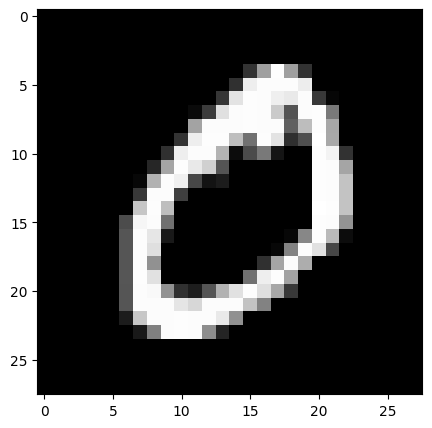

In [7]:
#veri setinden örnekler gösterilmesi
plt.figure(figsize=(5,5))
plt.imshow(x_train[1],cmap="gray")

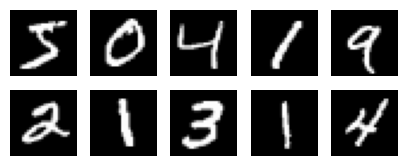

In [8]:
plt.figure(figsize=(5,5))
for n in range(0,10):
  ax=plt.subplot(5,5,n+1)
  plt.imshow(x_train[n],cmap="gray")
  plt.axis("off")



In [9]:
def visualize_img(data):
    plt.figure(figsize=(5,5))
    for n in range(0,10):
       ax=plt.subplot(5,5,n+1)
       plt.imshow(data[n],cmap="gray")
       plt.axis("off")


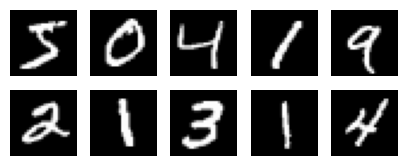

In [10]:
visualize_img(x_train)

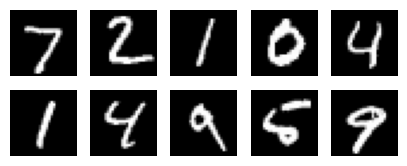

In [11]:
visualize_img(x_test)

In [12]:
x_train[2]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [13]:
x_train[2][14,10]

49

In [14]:
def pixel_visualize(img):
  plt.figure(figsize=(12,12))
  ax=plt.subplot(111)
  ax.imshow(img,cmap="gray")
  width,height=img.shape

  threshold=img.max()/2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                  color="white" if img[x][y]< threshold else "black")


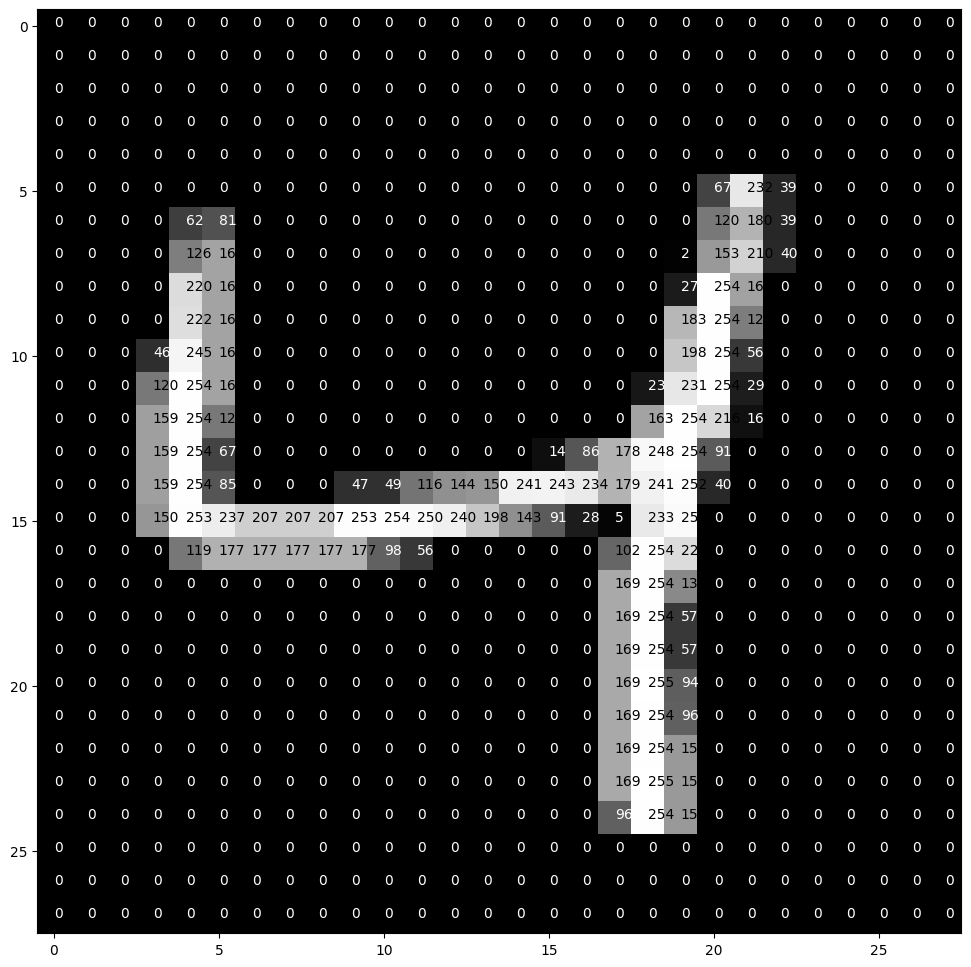

In [15]:
pixel_visualize(x_train[2])

# encoding

In [16]:
y_train[0:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [17]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [18]:
y_train[0:6]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# **reshaping**

In [19]:
image_size=x_train.shape[1]
image_size

28

In [20]:
print(f"x_test boyutu :{x_train.shape}")
print(f"x_test boyutu :{x_test.shape}")

x_test boyutu :(60000, 28, 28)
x_test boyutu :(10000, 28, 28)


In [21]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

print(f"x_test boyutu :{x_train.shape}")
print(f"x_test boyutu :{x_test.shape}")

x_test boyutu :(60000, 28, 28, 1)
x_test boyutu :(10000, 28, 28, 1)


# standardization

In [22]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

# sinir ağı mimarisini tanımlamak

In [26]:
from os import name
model=tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation="relu",name="llayer1"),
    Dense(units=num_labels,activation="softmax",name="output_layer")
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"]

)


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 llayer1 (Dense)             (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0126 - precision: 0.9977 - recall: 0.9969 - accuracy: 0.9974 - val_loss: 0.0779 - val_precision: 0.9794 - val_recall: 0.9763 - val_accuracy: 0.9779
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0103 - precision: 0.9982 - recall: 0.9975 - accuracy: 0.9980 - val_loss: 0.0790 - val_precision: 0.9787 - val_recall: 0.9757 - val_accuracy: 0.9768
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0088 - precision: 0.9987 - recall: 0.9984 - accuracy: 0.9986 - val_loss: 0.0815 - val_precision: 0.9789 - val_recall: 0.9763 - val_accuracy: 0.9771
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0086 - precision: 0.9984 - recall: 0.9980 - accuracy: 0.9983 - val_loss: 0.0765 - val_precision: 0.9805 - val_recall: 0.9784 - val_accuracy: 0.9792
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0066 - precision: 0.9991 - r

# model başarısının değerlendirilmesi

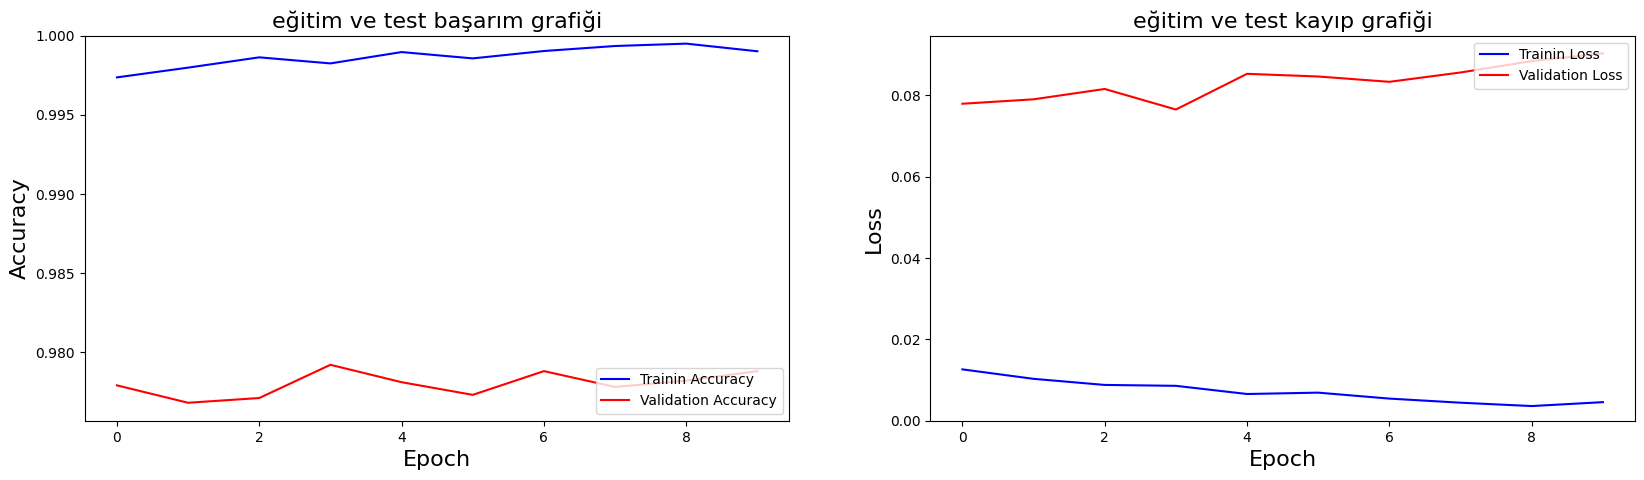

In [34]:
#loss ve accuracy grafikleri
#grafik accuracy
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],color="b",label="Trainin Accuracy")
plt.plot(history.history["val_accuracy"],color="r",label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title("eğitim ve test başarım grafiği",fontsize=16)

#loss grafiği
plt.subplot(1,2,2)
plt.plot(history.history["loss"],color="b",label="Trainin Loss")
plt.plot(history.history["val_loss"],color="r",label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("eğitim ve test kayıp grafiği",fontsize=16)
plt.show()



In [44]:
loss,precision,recall,acc=model.evaluate(x_test,y_test,verbose=False)
print("\n Test accuracy: %.1f%%" % (100.0*acc))
print("\n Test precision: %.1f%%" % (100.0*precision))
print("\n Test loss: %.1f%%" % (100.0*loss))
print("\n Test recall: %.1f%%" % (100.0*recall))


 Test accuracy: 97.9%

 Test precision: 98.0%

 Test loss: 9.0%

 Test recall: 97.8%


# modelin kaydedilmesi ve tahmin için kullanılması

In [45]:
model.save("mnist_model.h5")

In [64]:
import random
random_number = random.randint(0, x_test.shape[0])
random_number2 = random.randint(0, x_test.shape[0])
random_number, random_number2


(8571, 1865)

In [65]:
test_image=x_test[random_number]

In [66]:
test_image_2=x_test[random_number2]

In [67]:
y_test[random_number]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

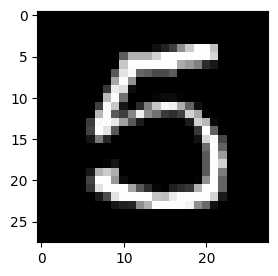

In [70]:
plt.figure(figsize=(3,3))
plt.imshow(x_test[random_number],cmap="gray")

In [68]:
y_test[random_number2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

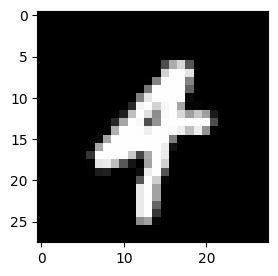

In [71]:
plt.figure(figsize=(3,3))
plt.imshow(x_test[random_number2],cmap="gray")

In [75]:
#tahmin
test_data=x_test[random_number2].reshape(1,28,28,1)
olasilik=model.predict(test_data)
olasilik

1/1 [==============================] - 0s 21ms/step


array([[3.3174965e-06, 8.7717068e-05, 7.7395085e-10, 1.5852373e-07,
        9.9943596e-01, 6.4573291e-11, 3.4073439e-12, 1.6343710e-04,
        7.7846041e-10, 3.0943798e-04]], dtype=float32)

In [76]:
tahmin_edilen_sınıf=np.argmax(olasilik)
tahmin_edilen_sınıf

4